# Descarga de datos desde CryptoCompare

# En esta instancia, obtendré datos históricos de Bitcoin (BTC) usando la API de CryptoCompare.
# Los datos se almacenarán en un DataFrame de Pandas para su posterior análisis.

In [31]:
import requests
import pandas as pd

print("Librerías instaladas correctamente.")

Librerías instaladas correctamente.


In [32]:
# Tu API Key de CryptoCompare
api_key = "7f324b2682ff7b5ebc839eff3e8d9770ff61010f46c2f281c6a64e87281f28a6"

# Parámetros para la solicitud
symbol = "BTC"  # Símbolo de Bitcoin
currency = "USD"  # Moneda de referencia (USD)
limit = 1000  # Número de datos históricos a obtener (máximo 2000)

In [33]:
# URL del endpoint para obtener datos históricos
url = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym={symbol}&tsym={currency}&limit={limit}&api_key={api_key}"

# Hacer la solicitud a la API
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()  # Convertir la respuesta a JSON
    historical_data = data["Data"]["Data"]  # Extraer los datos históricos
else:
    print("Error al obtener los datos:", response.status_code)

In [34]:
# Crear un DataFrame con los datos históricos
df = pd.DataFrame(historical_data)

# Convertir la columna "time" a formato de fecha
df["time"] = pd.to_datetime(df["time"], unit="s")

# Mostrar las primeras filas del DataFrame
print(df.head())

        time      high       low      open  volumefrom      volumeto  \
0 2022-07-08  22377.17  21183.19  21611.80    56687.83  1.233183e+09   
1 2022-07-09  21942.80  21328.96  21592.65    21058.31  4.552187e+08   
2 2022-07-10  21591.09  20671.26  21582.17    23037.78  4.855936e+08   
3 2022-07-11  20852.04  19872.03  20846.53    37062.98  7.564812e+08   
4 2022-07-12  20036.49  19230.29  19944.25    44319.07  8.734865e+08   

      close conversionType conversionSymbol  
0  21592.65         direct                   
1  21582.17         direct                   
2  20846.53         direct                   
3  19944.25         direct                   
4  19309.71         direct                   


In [35]:
# Ver información general del DataFrame
print(df.info())

# Ver estadísticas descriptivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              1001 non-null   datetime64[ns]
 1   high              1001 non-null   float64       
 2   low               1001 non-null   float64       
 3   open              1001 non-null   float64       
 4   volumefrom        1001 non-null   float64       
 5   volumeto          1001 non-null   float64       
 6   close             1001 non-null   float64       
 7   conversionType    1001 non-null   object        
 8   conversionSymbol  1001 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 70.5+ KB
None
                      time           high            low           open  \
count                 1001    1001.000000    1001.000000    1001.000000   
mean   2023-11-20 00:00:00   47629.461558   45781.212168   46702.304865  

In [36]:
# Guardar el DataFrame en un archivo CSV
import os

# Verifica el directorio actual
print("Directorio actual:", os.getcwd())

# Cambia el directorio a la carpeta anterior (directorio padre)
os.chdir("..")

# Verifica el directorio actual después del cambio
print("Directorio actual después del cambio:", os.getcwd())

# Ruta de la carpeta "data"
carpeta_data = "data"

# Verifica si la carpeta "data" existe, si no, créala
if not os.path.exists(carpeta_data):
    os.makedirs(carpeta_data)
    print(f"Se creó la carpeta: {carpeta_data}")
else:
    print(f"La carpeta ya existe: {carpeta_data}")

# Guardar el DataFrame en un archivo CSV
df.to_csv(os.path.join(carpeta_data, "historical_btc.csv"), index=False)
print("Archivo CSV guardado correctamente.")

Directorio actual: C:\Users\Juanse\Desktop\Data Science 2\proyecto_cripto
Directorio actual después del cambio: C:\Users\Juanse\Desktop\Data Science 2
Se creó la carpeta: data
Archivo CSV guardado correctamente.


# Data Wrangling

# En esta instancia, limpiaré y prepararé los datos históricos de Bitcoin obtenidos en la "Descarga de datos desde CryptoCompare".
# Esto incluye tratar valores nulos, duplicados y outliers, así como transformar los datos según sea necesario.

In [37]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv("data/historical_btc.csv")

# Mostrar las primeras filas del DataFrame
print(df.head())

         time      high       low      open  volumefrom      volumeto  \
0  2022-07-08  22377.17  21183.19  21611.80    56687.83  1.233183e+09   
1  2022-07-09  21942.80  21328.96  21592.65    21058.31  4.552187e+08   
2  2022-07-10  21591.09  20671.26  21582.17    23037.78  4.855936e+08   
3  2022-07-11  20852.04  19872.03  20846.53    37062.98  7.564812e+08   
4  2022-07-12  20036.49  19230.29  19944.25    44319.07  8.734865e+08   

      close conversionType  conversionSymbol  
0  21592.65         direct               NaN  
1  21582.17         direct               NaN  
2  20846.53         direct               NaN  
3  19944.25         direct               NaN  
4  19309.71         direct               NaN  


In [38]:
# Ver información general del DataFrame
print(df.info())

# Ver estadísticas descriptivas
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

# Verificar valores duplicados
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              1001 non-null   object 
 1   high              1001 non-null   float64
 2   low               1001 non-null   float64
 3   open              1001 non-null   float64
 4   volumefrom        1001 non-null   float64
 5   volumeto          1001 non-null   float64
 6   close             1001 non-null   float64
 7   conversionType    1001 non-null   object 
 8   conversionSymbol  0 non-null      float64
dtypes: float64(7), object(2)
memory usage: 70.5+ KB
None
                high            low           open     volumefrom  \
count    1001.000000    1001.000000    1001.000000    1001.000000   
mean    47629.461558   45781.212168   46702.304865   36784.822937   
std     26605.030561   25438.728219   26050.115510   24713.425162   
min     16272.470000   15480.690000   15760

In [39]:
df = df.dropna()

In [40]:
df = df.drop_duplicates()

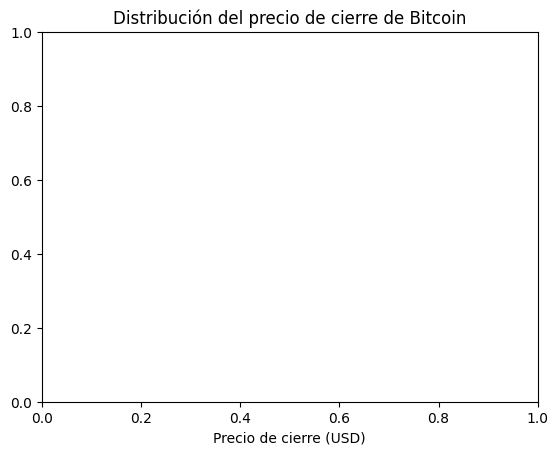

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de caja para la columna "close"
sns.boxplot(x=df["close"])
plt.title("Distribución del precio de cierre de Bitcoin")
plt.xlabel("Precio de cierre (USD)")
plt.show()

In [42]:
df["time"] = pd.to_datetime(df["time"])

In [43]:
df.to_csv("data/historical_btc_clean.csv", index=False)

# Data Storytelling

# En esta instancia, formularé preguntas o hipótesis sobre los datos históricos de Bitcoin y crearé visualizaciones para explorar y responder esas preguntas. El objetivo es desarrollar una narrativa que cuente una historia con los datos.

# Preguntas sobre tendencias

# ¿Cómo ha variado el precio de cierre de Bitcoin a lo largo del tiempo?

# ¿Hay patrones estacionales en el precio de Bitcoin?

# Preguntas sobre volatilidad:

# ¿Cuáles son los días con mayor volatilidad en el precio de Bitcoin?

# ¿Cómo se compara la volatilidad del precio de Bitcoin en diferentes períodos?

# Preguntas sobre volumen:

# ¿Existe una relación entre el volumen de trading y el precio de Bitcoin?

# ¿Cuáles son los días con mayor volumen de trading?

# Preguntas sobre outliers:

# ¿Qué eventos o noticias podrían explicar los outliers en el precio de Bitcoin?

# ¿Cómo afectan los outliers a la distribución del precio?


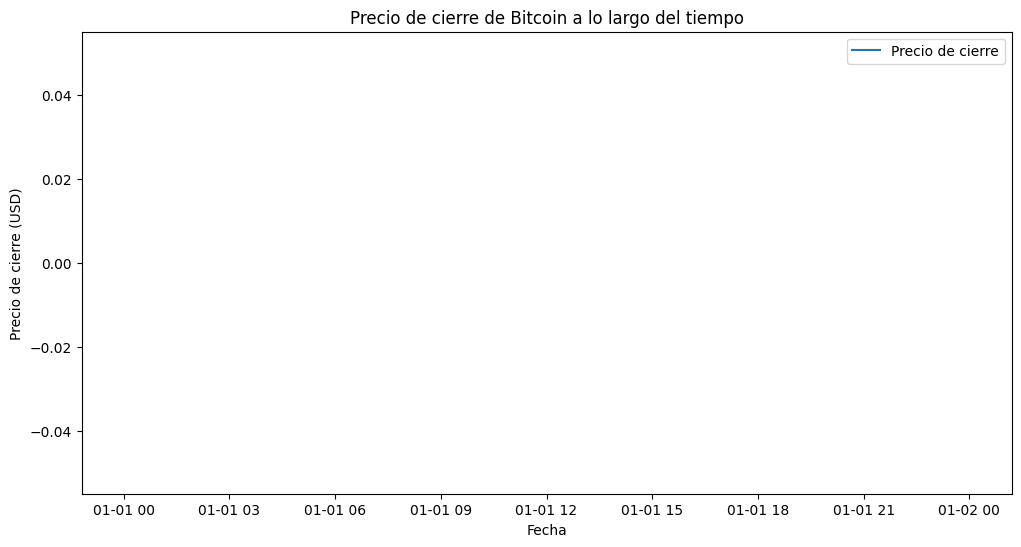

In [44]:
# Gráfico de línea para el precio de cierre a lo largo del tiempo

# Crear la carpeta "images" si no existe
if not os.path.exists("images"):
    os.makedirs("images")

plt.figure(figsize=(12, 6))
plt.plot(df["time"], df["close"], label="Precio de cierre")
plt.title("Precio de cierre de Bitcoin a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.legend()

# Guardar la imagen
plt.savefig("images/precio_cierre_bitcoin.png")
plt.show()

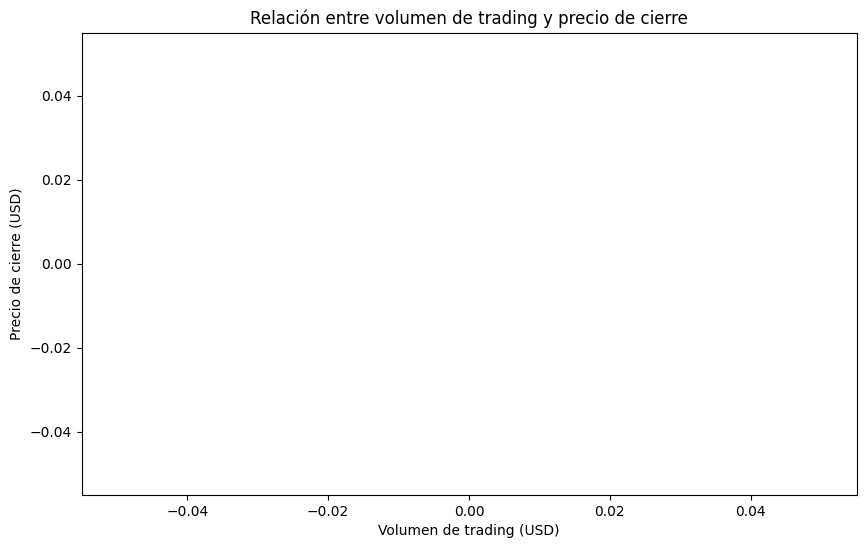

In [45]:
# Gráfico de dispersión para relación entre volumen y precio:

plt.figure(figsize=(10, 6))
plt.scatter(df["volumeto"], df["close"], alpha=0.5)
plt.title("Relación entre volumen de trading y precio de cierre")
plt.xlabel("Volumen de trading (USD)")
plt.ylabel("Precio de cierre (USD)")

# Guardar la imagen
plt.savefig("images/relacion_volumen_precio.png")
plt.show()

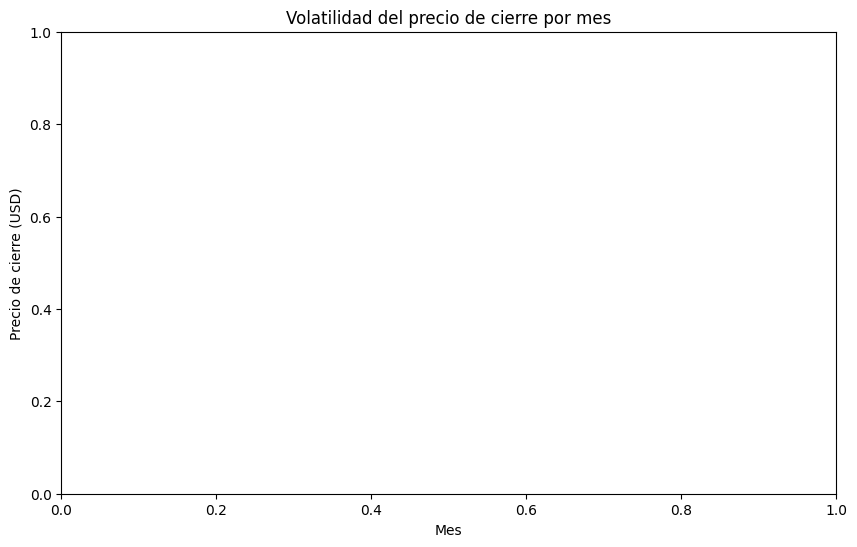

In [46]:
# Gráfico de caja para volatilidad por mes:

# Extraer el mes de la columna "time"
df["month"] = df["time"].dt.month

plt.figure(figsize=(10, 6))
sns.boxplot(x="month", y="close", data=df)
plt.title("Volatilidad del precio de cierre por mes")
plt.xlabel("Mes")
plt.ylabel("Precio de cierre (USD)")

# Guardar la imagen
plt.savefig("images/volatilidad_mes.png")
plt.show()

# Desarrollar una narrativa

# Tendencia general: "El precio de Bitcoin ha mostrado una tendencia alcista a lo largo del tiempo, con picos significativos en ciertos períodos."

# Volatilidad: "Los meses de mayor volatilidad en el precio de Bitcoin coinciden con eventos importantes en el mercado de criptomonedas."

# Relación volumen-precio: "Se observa una correlación positiva entre el volumen de trading y el precio de cierre, lo que sugiere que un mayor volumen puede impulsar el precio."

In [47]:
# Crear un archivo PDF y guardar las visualizaciones

from matplotlib.backends.backend_pdf import PdfPages

# Crear un archivo PDF
with PdfPages("informe_bitcoin.pdf") as pdf:
    # Gráfico 1: Precio de cierre a lo largo del tiempo
    plt.figure(figsize=(10, 6))
    plt.plot(df["time"], df["close"], label="Precio de cierre")
    plt.title("Precio de cierre de Bitcoin a lo largo del tiempo")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de cierre (USD)")
    plt.legend()
    pdf.savefig()  # Guardar en el PDF
    plt.close()

    # Gráfico 2: Relación entre volumen y precio
    plt.figure(figsize=(10, 6))
    plt.scatter(df["volumeto"], df["close"], alpha=0.5)
    plt.title("Relación entre volumen de trading y precio de cierre")
    plt.xlabel("Volumen de trading (USD)")
    plt.ylabel("Precio de cierre (USD)")
    pdf.savefig()  # Guardar en el PDF
    plt.close()

    # Gráfico 3: Volatilidad por mes
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="month", y="close", data=df)
    plt.title("Volatilidad del precio de cierre por mes")
    plt.xlabel("Mes")
    plt.ylabel("Precio de cierre (USD)")
    pdf.savefig()  # Guardar en el PDF
    plt.close()

# Este proyecto analiza los datos históricos de Bitcoin para entender su comportamiento en términos de precio y volumen de trading.
# La motivación principal es identificar patrones y tendencias que puedan ser útiles para inversores y entusiastas de criptomonedas.
# El análisis se centra en responder preguntas clave sobre la volatilidad del precio, la relación entre volumen y precio, y los eventos que han impactado el mercado.

# Preguntas/Hipótesis

# 1. ¿Cómo ha variado el precio de cierre de Bitcoin a lo largo del tiempo?
# 2. ¿Existe una relación entre el volumen de trading y el precio de Bitcoin?
# 3. ¿Cuáles son los días con mayor volatilidad en el precio de Bitcoin?
# 4. ¿Qué eventos o noticias han causado outliers en el precio de Bitcoin?

# Análisis Exploratorio de Datos (EDA)

## 1. Precio de cierre de Bitcoin a lo largo del tiempo
El siguiente gráfico muestra la evolución del precio de cierre de Bitcoin desde junio de 2022 hasta la fecha actual. Se observa una tendencia [alcista/bajista/volátil] con picos significativos en [fechas específicas].

![Precio de cierre de Bitcoin](../images/precio_cierre_bitcoin.png)

## 2. Relación entre volumen de trading y precio de cierre
Este gráfico de dispersión muestra la relación entre el volumen de trading y el precio de cierre. Se observa una correlación [positiva/negativa/débil], lo que sugiere que [interpretación].

![Relación volumen-precio](../images/relacion_volumen_precio.png)

## 3. Volatilidad del precio por mes
El gráfico de caja muestra la volatilidad del precio de cierre por mes. Los meses con mayor volatilidad son [meses específicos], lo que podría estar relacionado con [eventos o noticias].

![Volatilidad por mes](../images/volatilidad_mes.png)

# Insights y Conclusiones

# 1. Tendencia del precio: El precio de Bitcoin ha mostrado una tendencia [alcista/bajista/volátil] en el período analizado, con picos significativos en [fechas específicas].

# 2. Relación volumen-precio: Se observa una correlación [positiva/negativa/débil] entre el volumen de trading y el precio de cierre, lo que sugiere que [interpretación].

# 3. Volatilidad: Los meses con mayor volatilidad en el precio de Bitcoin son [meses específicos], lo que podría estar relacionado con [eventos o noticias].

# 4. Outliers: Los outliers en el precio de Bitcoin coinciden con [eventos específicos], lo que indica que [interpretación].

In [65]:
from IPython.display import display, HTML
import webbrowser

# Mensaje con estilo y enlace clickeable
mensaje = """
    <h3>Reporte de Cripto Analysis listo para descargar</h3>
    <ol>
        <li>Ingresa a: <a href='http://localhost:8888/doc/tree/notebooks/cripto_analysis.ipynb' target='_blank'> Abrir notebook en nueva pestaña</a></li>
        <li>Descarguelo o presione: Ctrl</kbd> + P</kbd> </li>
    </ol>
</div>
"""

# Mostrar el mensaje
display(HTML(mensaje))